In [1]:
# src: https://www.kaggle.com/isbhargav/guide-to-pytorch-learning-rate-scheduling

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import matplotlib.pyplot as plt


# 1. LAMBDA LR

Sets the learning rate of each parameter group to the initial lr times a given function. When last_epoch=-1, sets initial lr as lr.

$$
l r_{\text {epoch}} = l r_{\text {initial}} * Lambda(epoch)
$$


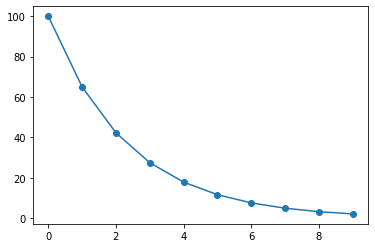

In [5]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
lambda1 = lambda epoch: 0.65 ** epoch
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)


lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ", round(0.65 ** i,3)," , Learning Rate = ",round(optimizer.param_groups[0]["lr"],3))
    scheduler.step()

plt.plot(range(10),lrs, '-o')

# 2. MultiplicativeLR

Multiply the learning rate of each parameter group by the factor given in the specified function. When last_epoch=-1, sets initial lr as lr.

$$
l r_{\text {epoch}} = l r_{\text {epoch - 1}} * Lambda(epoch)
$$

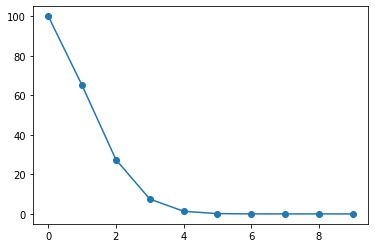

In [7]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
lmbda = lambda epoch: 0.65 ** epoch
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=lmbda)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.95," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs, '-o')

# 3. StepLR

Decays the learning rate of each parameter group by gamma every step_size epochs. Notice that such decay can happen simultaneously with other changes to the learning rate from outside this scheduler. When last_epoch=-1, sets initial lr as lr.

$$
l r_{\text {epoch}}=\left\{\begin{array}{ll}
Gamma * l r_{\text {epoch - 1}}, & \text { if } {\text {epoch % step_size}}=0 \\
l r_{\text {epoch - 1}}, & \text { otherwise }
\end{array}\right.
$$

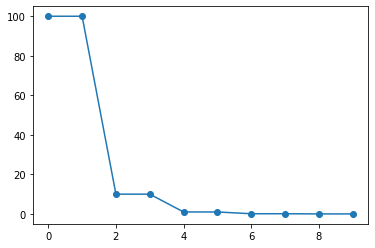

In [9]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1 if i!=0 and i%2!=0 else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs, '-o')

# 4. MultiStepLR

Decays the learning rate of each parameter group by gamma once the number of epoch reaches one of the milestones. Notice that such decay can happen simultaneously with other changes to the learning rate from outside this scheduler. When last_epoch=-1, sets initial lr as lr.

$$
l r_{\text {epoch}}=\left\{\begin{array}{ll}
Gamma * l r_{\text {epoch - 1}}, & \text { if } {\text{ epoch in [milestones]}} \\
l r_{\text {epoch - 1}}, & \text { otherwise }
\end{array}\right.
$$

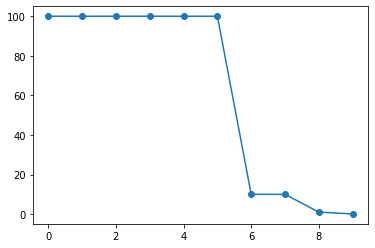

In [10]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[6,8,9], gamma=0.1)
lrs = []

for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1 if i in [6,8,9] else 1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(range(10),lrs, '-o')

# 5. ExponentialLR

Decays the learning rate of each parameter group by gamma every epoch. When last_epoch=-1, sets initial lr as lr.

$$
l r_{\text {epoch}}= Gamma * l r_{\text {epoch - 1}}
$$


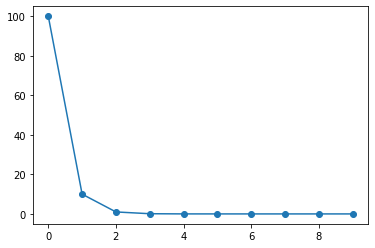

In [11]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)
lrs = []


for i in range(10):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",0.1," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs, '-o')

# 6. CosineAnnealingLR

Set the learning rate of each parameter group using a cosine annealing schedule.
When last_epoch=-1, sets initial lr as lr. Notice that because the schedule is defined recursively, the learning rate can be simultaneously modified outside this scheduler by other operators. If the learning rate is set solely by this scheduler, the learning rate at each step becomes:

$$
\eta_{t}=\eta_{\min }+\frac{1}{2}\left(\eta_{\max }-\eta_{\min }\right)\left(1+\cos \left(\frac{T_{c u r}}{T_{\max }} \pi\right)\right)
$$

It has been proposed in SGDR: Stochastic Gradient Descent with Warm Restarts. Note that this only implements the cosine annealing part of SGDR, and not the restarts.https://arxiv.org/abs/1608.03983

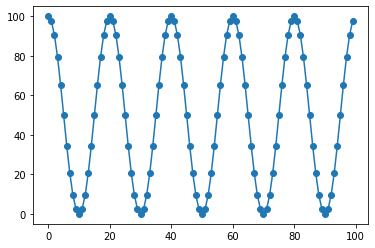

In [12]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs, '-o')


# 7. CyclicLR - triangular



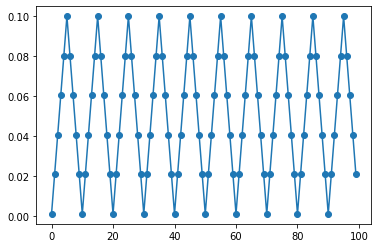

In [13]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="triangular")
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs, '-o')

# 7. CyclicLR - triangular2


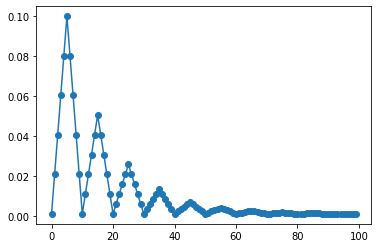

In [14]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="triangular2")
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs, '-o')

# 7. CyclicLR - exp_range


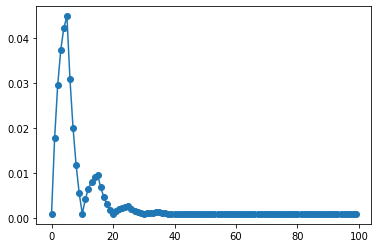

In [15]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=100)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1,step_size_up=5,mode="exp_range",gamma=0.85)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs, '-o')

# 8.OneCycleLR - cos

Sets the learning rate of each parameter group according to the 1cycle learning rate policy. The 1cycle policy anneals the learning rate from an initial learning rate to some maximum learning rate and then from that maximum learning rate to some minimum learning rate much lower than the initial learning rate. This policy was initially described in the paper Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates.

The 1cycle learning rate policy changes the learning rate after every batch. step should be called after a batch has been used for training.

This scheduler is not chainable.

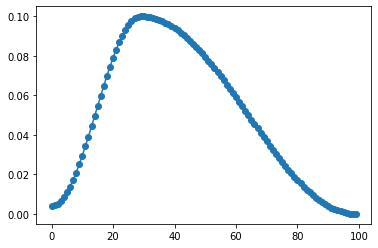

In [16]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=10, epochs=10)
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs, '-o')

# 8.OneCycleLR - linear

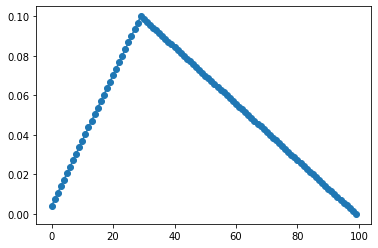

In [17]:

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=10, epochs=10,anneal_strategy='linear')
lrs = []


for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
#     print("Factor = ",i," , Learning Rate = ",optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs, '-o')

# 9.CosineAnnealingWarmRestarts
Set the learning rate of each parameter group using a cosine annealing schedule, and restarts after Ti epochs.


$$
\eta_{t}=\eta_{\min }+\frac{1}{2}\left(\eta_{\max }-\eta_{\min }\right)\left(1+\cos \left(\frac{T_{\operatorname{cur}}}{T_{i}} \pi\right)\right)
$$


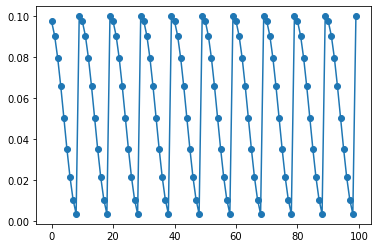

In [18]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
lr_sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.001, last_epoch=-1)


lrs = []

for i in range(100):
    lr_sched.step()
    lrs.append(
        optimizer.param_groups[0]["lr"]
    )

plt.plot(lrs, '-o')

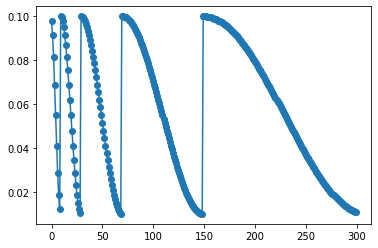

In [20]:
import torch
import matplotlib.pyplot as plt

model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
lr_sched = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.01, last_epoch=-1)


lrs = []

for i in range(300):
    lr_sched.step()
    lrs.append(
        optimizer.param_groups[0]["lr"]
    )

plt.plot(lrs, '-o')